In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [24]:
data_path = "../../data/final/person_drug_side_effect.csv"

df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1048575, 4)


,person_id,drug_name,side_effect,genetic_score
0,1,doxorubicin,Gastrointestinal pain,118
1,1,doxorubicin,Abdominal pain,118
2,1,doxorubicin,Abscess,118
3,1,doxorubicin,Agranulocytosis,118
4,1,doxorubicin,Albuminuria,118


In [25]:
df.columns


Index(['person_id', 'drug_name', 'side_effect', 'genetic_score'], dtype='object')

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   person_id      1048575 non-null  int64 
 1   drug_name      1048575 non-null  object
 2   side_effect    1048575 non-null  object
 3   genetic_score  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [27]:
df.isnull().sum()


person_id        0
drug_name        0
side_effect      0
genetic_score    0
dtype: int64

In [28]:
df.describe()


,person_id,genetic_score
count,1.048575e+06,1.048575e+06
mean,9.645642e+01,6.291678e+02
std,5.538742e+01,5.548191e+02
min,1.000000e+00,1.000000e+00
25%,4.800000e+01,9.200000e+01
50%,9.600000e+01,4.000000e+02
75%,1.440000e+02,1.193000e+03
max,1.920000e+02,1.651000e+03


## ADR Label Generation (Rule-Based)
# ADR labels are generated using a rule-based approach.
For each drug:
- The 75th percentile of genetic_score is calculated
- Individuals with genetic_score ≥ this threshold are labeled as high ADR risk (1)
- Others are labeled as low ADR risk (0)

In [29]:
df["adr_label"] = 0


In [30]:
for drug in df["drug_name"].unique():
    drug_mask = df["drug_name"] == drug
    
    threshold = df.loc[drug_mask, "genetic_score"].quantile(0.75)
    
    df.loc[
        drug_mask & (df["genetic_score"] >= threshold),
        "adr_label"
    ] = 1


In [31]:
df["adr_label"].value_counts()


adr_label
0    764806
1    283769
Name: count, dtype: int64

In [32]:
df.groupby("drug_name")["adr_label"].mean().head()


drug_name
amlodipine      0.250000
aspirin         0.255208
atenolol        0.250000
capecitabine    0.307292
citalopram      0.250000
Name: adr_label, dtype: float64

# The ADR label distribution confirms that approximately the top 25% 

## Exploratory Data Analysis (EDA)
This section explores the relationship between genetic risk scores,
drugs, side effects, and generated ADR labels to validate the labeling strategy

In [33]:
df["adr_label"].value_counts()



adr_label
0    764806
1    283769
Name: count, dtype: int64

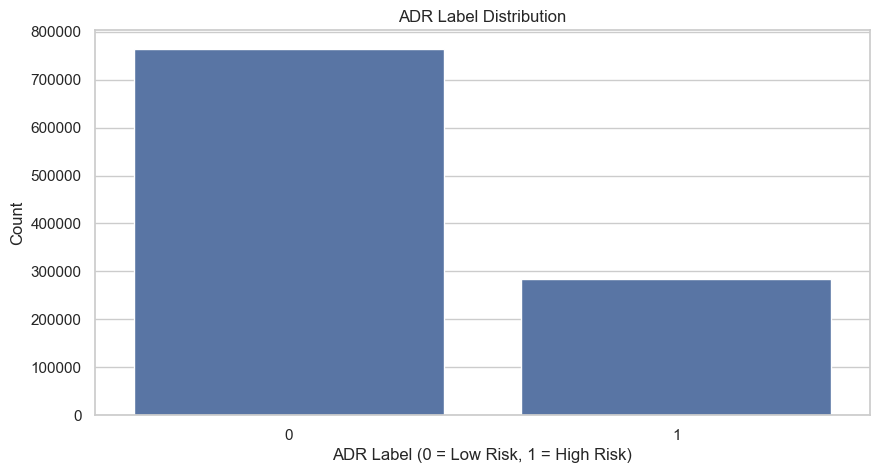

In [34]:
sns.countplot(x="adr_label", data=df)
plt.title("ADR Label Distribution")
plt.xlabel("ADR Label (0 = Low Risk, 1 = High Risk)")
plt.ylabel("Count")
plt.show()


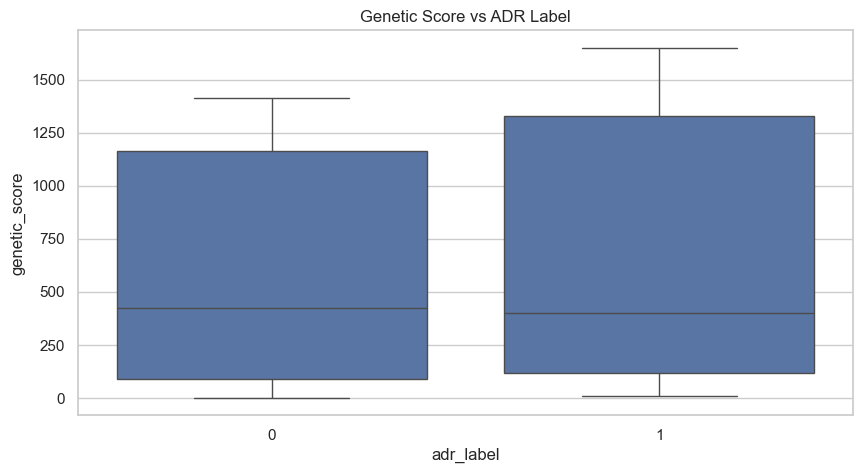

In [35]:
sns.boxplot(x="adr_label", y="genetic_score", data=df)
plt.title("Genetic Score vs ADR Label")
plt.show()


In [ ]:
sns.histplot(df["genetic_score"], bins=30, kde=True)
plt.title("Distribution of Genetic Scores")
plt.xlabel("Genetic Score")
plt.ylabel("Frequency")
plt.show()


# Which drugs show more genetically high-risk individuals?

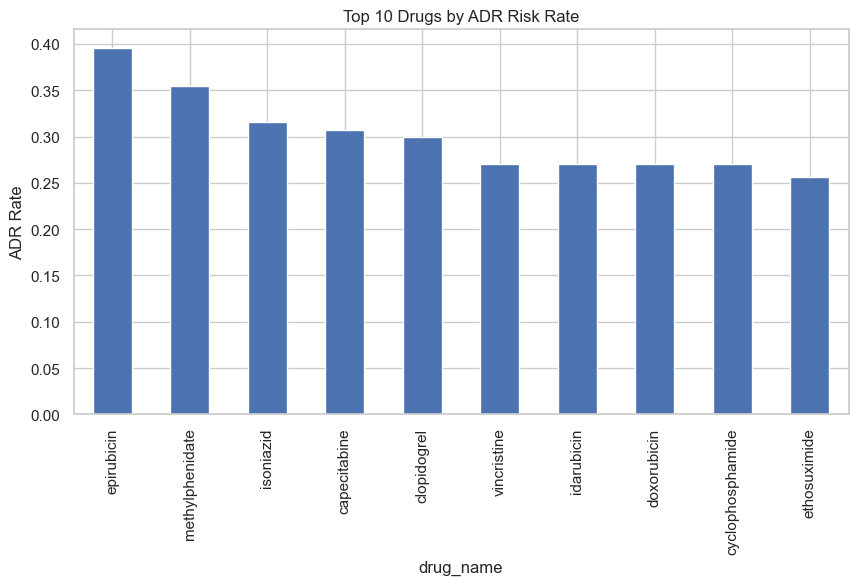

In [ ]:
drug_adr_rate = (
    df.groupby("drug_name")["adr_label"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

drug_adr_rate.plot(kind="bar")
plt.title("Top 10 Drugs by ADR Risk Rate")
plt.ylabel("ADR Rate")
plt.show()


# Which side effects are common among high-risk individuals?

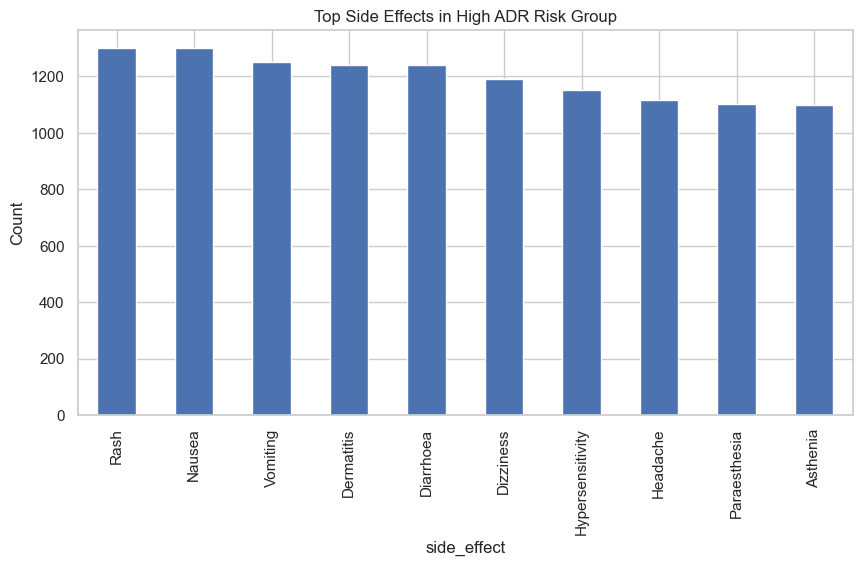

In [ ]:
top_side_effects = (
    df[df["adr_label"] == 1]
    .groupby("side_effect")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

top_side_effects.plot(kind="bar")
plt.title("Top Side Effects in High ADR Risk Group")
plt.ylabel("Count")
plt.show()


## Final Dataset Export

In [ ]:
final_data_path = "../../data/final/person_drug_side_effect_adr_labeled.csv"

df.to_csv(final_data_path, index=False)

print("Final labeled dataset saved to:", final_data_path)


Final labeled dataset saved to: ../../data/final/person_drug_side_effect_adr_labeled.csv


In [ ]:
pd.read_csv(final_data_path).head()


,person_id,drug_name,side_effect,genetic_score,adr_label
0,1,doxorubicin,Gastrointestinal pain,118,1
1,1,doxorubicin,Abdominal pain,118,1
2,1,doxorubicin,Abscess,118,1
3,1,doxorubicin,Agranulocytosis,118,1
4,1,doxorubicin,Albuminuria,118,1
